# Problem 1 - BatchNorm (5 points)
Batch Normalization (BatchNorm) is a technique used in deep learning to improve the training of neural networks. It helps to address the problem of internal covariate shift by normalizing the inputs to each layer. 

Pros of BatchNorm:

* Accelerates training: BatchNorm allows the use of higher learning rates, which speeds up the training process.
* Reduces sensitivity to initialization: By normalizing the inputs to each layer, BatchNorm reduces the dependence on weight initialization.
* Regularization effect: BatchNorm introduces a slight amount of noise during training, which can have a regularizing effect, reducing the need for other regularization techniques such as dropout.


Cons of BatchNorm:

* Reduced performance in small batch sizes: BatchNorm estimates the mean and variance of each feature from the current mini-batch, which can be noisy for small batch sizes, leading to unstable training.
* Inference-time inconsistency: During inference, BatchNorm uses the moving average of the mean and variance computed during training, which can cause inconsistencies between training and inference.
* Not well-suited for RNNs: BatchNorm's reliance on batch statistics makes it challenging to apply to recurrent neural networks (RNNs), as the temporal dependencies can be disrupted.


BatchNorm might fail in situations where:

* The network has a small mini-batch size, resulting in noisy estimates of mean and variance.
* The input distribution changes significantly during training, causing the moving average statistics to become outdated.
* The network is an RNN or another architecture that is not well-suited for BatchNorm.

Alternatives to BatchNorm and their pros and cons:

Layer Normalization (LayerNorm):

Pros:

* Normalizes across features instead of the batch, which makes it more suitable for RNNs and small batch sizes.
* No moving averages required during inference, eliminating inconsistency issues.

Cons:

* Less effective for convolutional neural networks (CNNs) due to its inability to exploit the spatial structure of the data.

Instance Normalization (InstanceNorm):

Pros:

* Specifically designed for style transfer tasks, as it normalizes each feature map independently.

Cons:

* Not a general-purpose normalization method; primarily used for specific tasks like style transfer.

Group Normalization (GroupNorm):

Pros:

* Divides the channels into smaller groups and normalizes within each group, making it more suitable for small batch sizes and RNNs.
* Less sensitive to the choice of the batch size.

Cons:

* An additional hyperparameter (group size) needs to be tuned.

Properties of an ideal normalization method:

* Stable and accurate statistics: The method should provide accurate and stable estimates of mean and variance, regardless of the batch size.
* General applicability: The method should be applicable to various types of network architectures, including CNNs, RNNs, and transformers.
* Consistency between training and inference: The method should ensure that the behavior of the network during training is consistent with its behavior during inference.
* Minimal hyperparameter tuning: The method should have few or no additional hyperparameters that require tuning.
* Fast convergence and improved training: The method should speed up the training process, reduce the dependence on initialization, and improve the overall performance of the network.

(Used ChatGPT and https://stats.stackexchange.com/questions/304755/pros-and-cons-of-weight-normalization-vs-batch-normalization)

# Problem 2 - Using a Pre-Trained CNN (10 points total)

In [1]:
import torch
import torchvision.models as models
from torchvision.transforms import transforms
from PIL import Image
from torchvision.models import resnet50, ResNet50_Weights

## Part 1 - Using Pre-Trained Deep CNN (5 points)


In [2]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.eval()

img_path = 'peppers.jpg'
img = Image.open(img_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)

with torch.no_grad():
    output = model(img_tensor)

probabilities = torch.nn.functional.softmax(output[0], dim=0)
top3_probs, top3_indices = torch.topk(probabilities, 3)

Using cache found in C:\Users\minds/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\minds\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\minds\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import requests

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response = requests.get(url)
imagenet_classes = [line.strip() for line in response.text.split('\n')]

In [4]:
for i in zip(top3_indices.tolist(), top3_probs.tolist()):
    print(imagenet_classes[i[0]] + ' with probability: ' + str(i[1]))

bell pepper with probability: 0.9999072551727295
cucumber with probability: 7.564305269625038e-05
grocery store with probability: 2.6528389298619004e-06


## Part 2 - Visualizing Feature Maps (5 points)

C:\Users\minds\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\minds\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


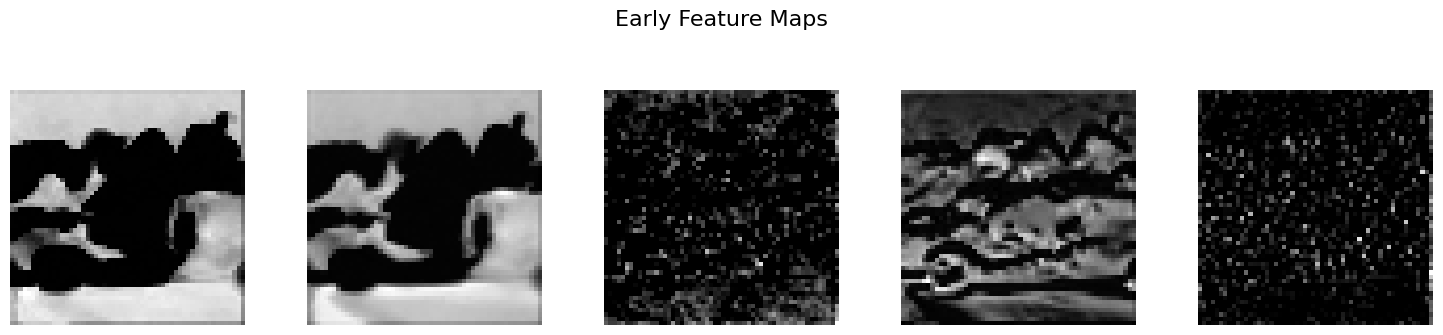

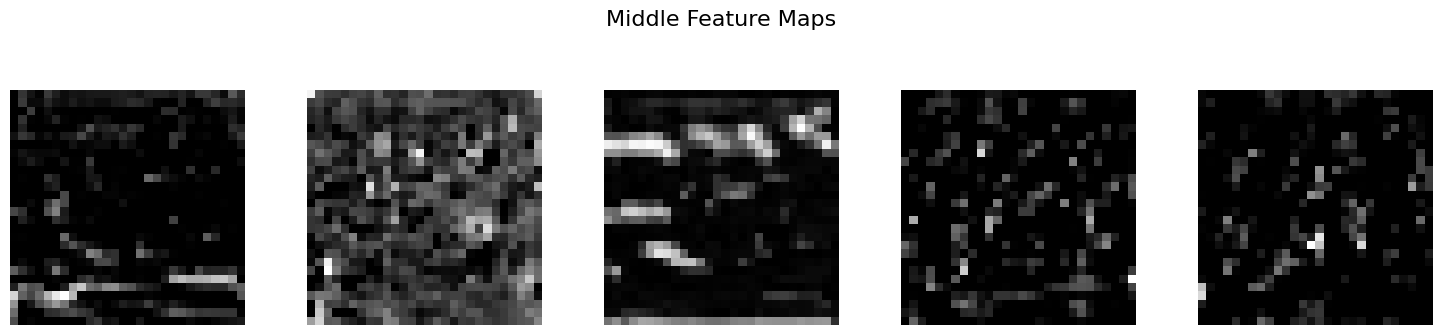

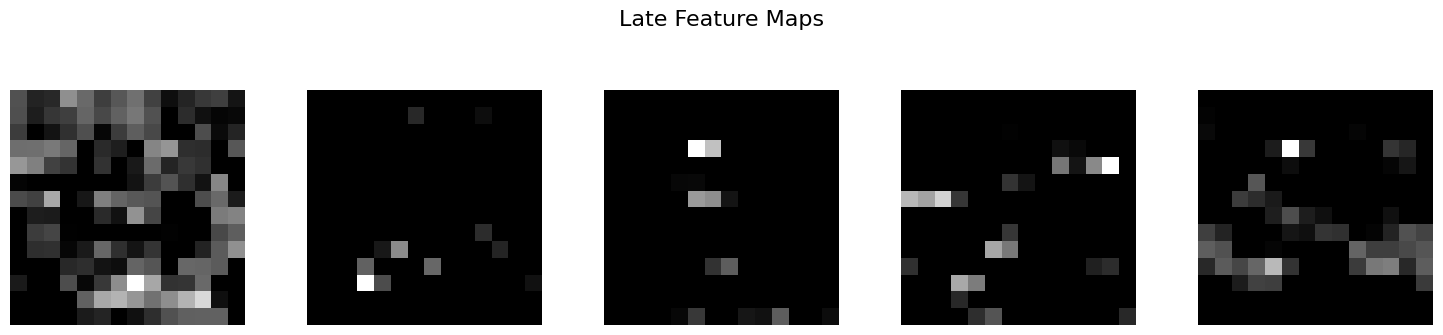

In [5]:
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_tensor = transform(img)

# Add a batch dimension and move the tensor to the appropriate device
input_tensor = input_tensor.unsqueeze(0)

# Load pre-trained ResNet50 model
model = models.resnet50(pretrained=True)

# Register forward hooks for specific layers
feature_maps = []

def hook_fn(module, input, output):
    feature_maps.append(output.detach())

# Choose layers to hook (1 early, 1 middle, and 1 late layer)
early_layer = model.layer1[2]
middle_layer = model.layer2[3]
late_layer = model.layer3[5]

hook_layers = [early_layer, middle_layer, late_layer]

# Register hooks
for layer in hook_layers:
    layer.register_forward_hook(hook_fn)

# Get the feature maps
with torch.no_grad():
    model.eval()
    _ = model(input_tensor)

# Normalize and plot feature maps
def plot_feature_maps(feature_map, title):
    num_maps = 5
    fmap = feature_map.cpu().data.numpy()[0]
    
    # Select `num_maps` interesting feature maps
    fmap = fmap[:num_maps]

    # Normalize between 0 and 1
    fmap_min, fmap_max = fmap.min(), fmap.max()
    fmap = (fmap - fmap_min) / (fmap_max - fmap_min)

    # Plot feature maps
    fig, axes = plt.subplots(1, num_maps, figsize=(15, 3), tight_layout=True)
    fig.suptitle(title, fontsize=16, y=1.1)
    for i in range(num_maps):
        axes[i].imshow(fmap[i], cmap='gray')
        axes[i].axis('off')

    plt.show()

# Display and discuss the structure of the feature maps
layer_types = ["Early", "Middle", "Late"]
for i, fmap in enumerate(feature_maps):
    plot_feature_maps(fmap, f"{layer_types[i]} Feature Maps")

In a convolutional neural network (CNN), the early feature maps are generated by the first few layers of the network and represent low-level features such as edges and color blobs. The middle feature maps are generated by intermediate layers and represent more complex features such as patterns and textures. The late feature maps are generated by the final layers and represent the global properties of the input image that are relevant for classification. Each stage of processing extracts more abstract and high-level features from the input image, until a final prediction is made based on the features extracted from the late feature maps.

# Problem 3 - Transfer Learning with a Pre-Trained CNN (20 points)

In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os

In [7]:
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from torchvision.models import resnet50, ResNet50_Weights

# Load data
def load_data(data_dir):
    # Load a pre-trained CNN model
    cnn = models.resnet50(weights=ResNet50_Weights.DEFAULT)
    # Remove the final softmax layer
    cnn = torch.nn.Sequential(*(list(cnn.children())[:-1]))

    # Define image transformations
    data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    features = []
    labels = []
    label_to_int = {}
    current_label_int = 0

    for filename in os.listdir(data_dir):
        if filename.endswith('.jpg'):
            image_path = os.path.join(data_dir, filename)
            image = Image.open(image_path).convert('RGB')
            image = data_transforms(image)
            image = image.unsqueeze(0)  # Add a batch dimension

            with torch.no_grad():
                feature = cnn(image).numpy().flatten()  # Extract features

            features.append(feature)
            label = filename.split('.')[0].split('_')[0]

            if label not in label_to_int:
                label_to_int[label] = current_label_int
                current_label_int += 1

            labels.append(label_to_int[label])

    features = normalize(features, axis=1)  # Normalize the features
    return np.array(features), np.array(labels)

# Load the dataset and extract features
data_dir = 'images/'
features, labels = load_data(data_dir)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the PyTorch linear classifier
class LinearClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

# Create and train the linear classifier
num_classes = len(np.unique(labels))
input_size = X_train.shape[1]
classifier = LinearClassifier(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        optimizer.zero_grad()
        outputs = classifier(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the linear classifier on the test set
classifier.eval()
with torch.no_grad():
    outputs = classifier(X_test)
    _, y_pred = torch.max(outputs, 1)
    accuracy = (y_pred == y_test).sum().item() / len(y_test)

print(f"Mean-per-class accuracy: {accuracy * 100:.2f}%")

Epoch [10/100], Loss: 2.3349
Epoch [20/100], Loss: 1.6038
Epoch [30/100], Loss: 1.1573
Epoch [40/100], Loss: 0.8650
Epoch [50/100], Loss: 0.6619
Epoch [60/100], Loss: 0.5152
Epoch [70/100], Loss: 0.4065
Epoch [80/100], Loss: 0.3241
Epoch [90/100], Loss: 0.2609
Epoch [100/100], Loss: 0.2119
Mean-per-class accuracy: 74.76%


# Problem 4 - Training a Small CNN (55 points total)

## Part 1 (25 points)

In [8]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

In [9]:
class MishCNN(nn.Module):
    def __init__(self):
        super(MishCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 7, padding=3)
        self.mish = nn.Mish()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.mish(x)
        x = self.conv2(x)
        x = self.mish(x)
        x = self.conv3(x)
        x = self.mish(x)
        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


Tune hyperparameters on small subset of data

In [11]:
from torch.utils.data import Subset
subset_size = 1000
indices = torch.randperm(len(train_dataset))[:subset_size]

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
small_train_dataset = Subset(train_dataset, indices)
small_train_loader = DataLoader(small_train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

def train_model(model, train_loader, criterion, optimizer, device, epochs, scheduler=False):
    model.train()
    train_loss = []

    for epoch in range(epochs):
        epoch_loss = 0.0
        for i, data in enumerate(train_loader):
            images, labels = data

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
        
        if scheduler:
            scheduler.step()

        train_loss.append(epoch_loss / (i + 1))
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss / (i + 1):.4f}")
    
    return model, train_loss

In [12]:
# Hyperparameters
learning_rate = 0.005
epochs = 30

tune_CNN = MishCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(tune_CNN.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

tune_model, train_loss = train_model(tune_CNN, small_train_loader, criterion, optimizer, device, epochs, scheduler)

Epoch [1/30], Loss: 2.2524
Epoch [2/30], Loss: 2.1384
Epoch [3/30], Loss: 2.0557
Epoch [4/30], Loss: 1.9934
Epoch [5/30], Loss: 1.9698
Epoch [6/30], Loss: 1.9447
Epoch [7/30], Loss: 1.9154
Epoch [8/30], Loss: 1.9054
Epoch [9/30], Loss: 1.8339
Epoch [10/30], Loss: 1.7965
Epoch [11/30], Loss: 1.7911
Epoch [12/30], Loss: 1.7421
Epoch [13/30], Loss: 1.6955
Epoch [14/30], Loss: 1.6609
Epoch [15/30], Loss: 1.6583
Epoch [16/30], Loss: 1.6453
Epoch [17/30], Loss: 1.6641
Epoch [18/30], Loss: 1.6495
Epoch [19/30], Loss: 1.5702
Epoch [20/30], Loss: 1.5916
Epoch [21/30], Loss: 1.5558
Epoch [22/30], Loss: 1.5412
Epoch [23/30], Loss: 1.5184
Epoch [24/30], Loss: 1.4901
Epoch [25/30], Loss: 1.4685
Epoch [26/30], Loss: 1.4472
Epoch [27/30], Loss: 1.4558
Epoch [28/30], Loss: 1.4588
Epoch [29/30], Loss: 1.3982
Epoch [30/30], Loss: 1.3588


| lr | batch size | epochs | loss |
|---|---|---|---|
|0.001|100|10|1.9465|
|0.01|100|10|1.7782|
|0.001|100|30|1.6988|
|0.01|500|10|2.0347|
|0.01|50|10|1.8516|
|0.01|128|10|1.7365|
|0.0075|128|15|1.6005|
|0.008|128|15|1.6820|
|0.0085|128|15|1.5968|
|0.005|128|30|1.3087|


In [13]:
learning_rate = 0.005
epochs = 30

model_CNN = MishCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_CNN.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

model_CNN, train_loss_cnn = train_model(model_CNN, train_loader, criterion, optimizer, device, epochs, scheduler)

Epoch [1/30], Loss: 1.7267
Epoch [2/30], Loss: 1.3564
Epoch [3/30], Loss: 1.1838
Epoch [4/30], Loss: 1.0711
Epoch [5/30], Loss: 1.0013
Epoch [6/30], Loss: 0.9498
Epoch [7/30], Loss: 0.8979
Epoch [8/30], Loss: 0.8784
Epoch [9/30], Loss: 0.8396
Epoch [10/30], Loss: 0.8122
Epoch [11/30], Loss: 0.7901
Epoch [12/30], Loss: 0.7661
Epoch [13/30], Loss: 0.7492
Epoch [14/30], Loss: 0.7275
Epoch [15/30], Loss: 0.7206
Epoch [16/30], Loss: 0.6981
Epoch [17/30], Loss: 0.6877
Epoch [18/30], Loss: 0.6799
Epoch [19/30], Loss: 0.6533
Epoch [20/30], Loss: 0.6544
Epoch [21/30], Loss: 0.6403
Epoch [22/30], Loss: 0.6421
Epoch [23/30], Loss: 0.6276
Epoch [24/30], Loss: 0.6189
Epoch [25/30], Loss: 0.6086
Epoch [26/30], Loss: 0.5952
Epoch [27/30], Loss: 0.5936
Epoch [28/30], Loss: 0.5937
Epoch [29/30], Loss: 0.5896
Epoch [30/30], Loss: 0.5823


In [14]:
def evaluate_model(model, test_loader):
    model.eval()
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch_images, batch_labels in test_loader:
            batch_images, batch_labels = batch_images.to(device), batch_labels.to(device)
            batch_outputs = model(batch_images)
            _, predicted_labels = torch.max(batch_outputs, 1)
            total_predictions += batch_labels.size(0)
            correct_predictions += (predicted_labels == batch_labels).sum().item()

    test_accuracy = 100 * correct_predictions / total_predictions
    return test_accuracy

In [15]:
test_accuracy = evaluate_model(model_CNN, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 76.98%


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_filters(layer):
    filters = layer.weight.data.cpu().numpy()
    num_filters = filters.shape[0]
    num_channels = filters.shape[1]

    # Normalize the filter values between 0 and 1 for visualization purposes
    filters_min, filters_max = np.amin(filters), np.amax(filters)
    filters = (filters - filters_min) / (filters_max - filters_min)

    # Plot the filters
    rows, cols = 4, 8
    fig, axs = plt.subplots(rows, cols, figsize=(2 * cols, 2 * rows))
    for i in range(num_filters):
        row, col = i // cols, i % cols
        rgb_filter = np.transpose(filters[i], (1, 2, 0))  # Rearrange dimensions to match the expected input for imshow
        axs[row, col].imshow(rgb_filter)
        axs[row, col].set_title(f'Filter {i + 1}')
        axs[row, col].axis('off')

    # Remove unused subplots
    for i in range(num_filters, rows * cols):
        row, col = i // cols, i % cols
        fig.delaxes(axs[row, col])

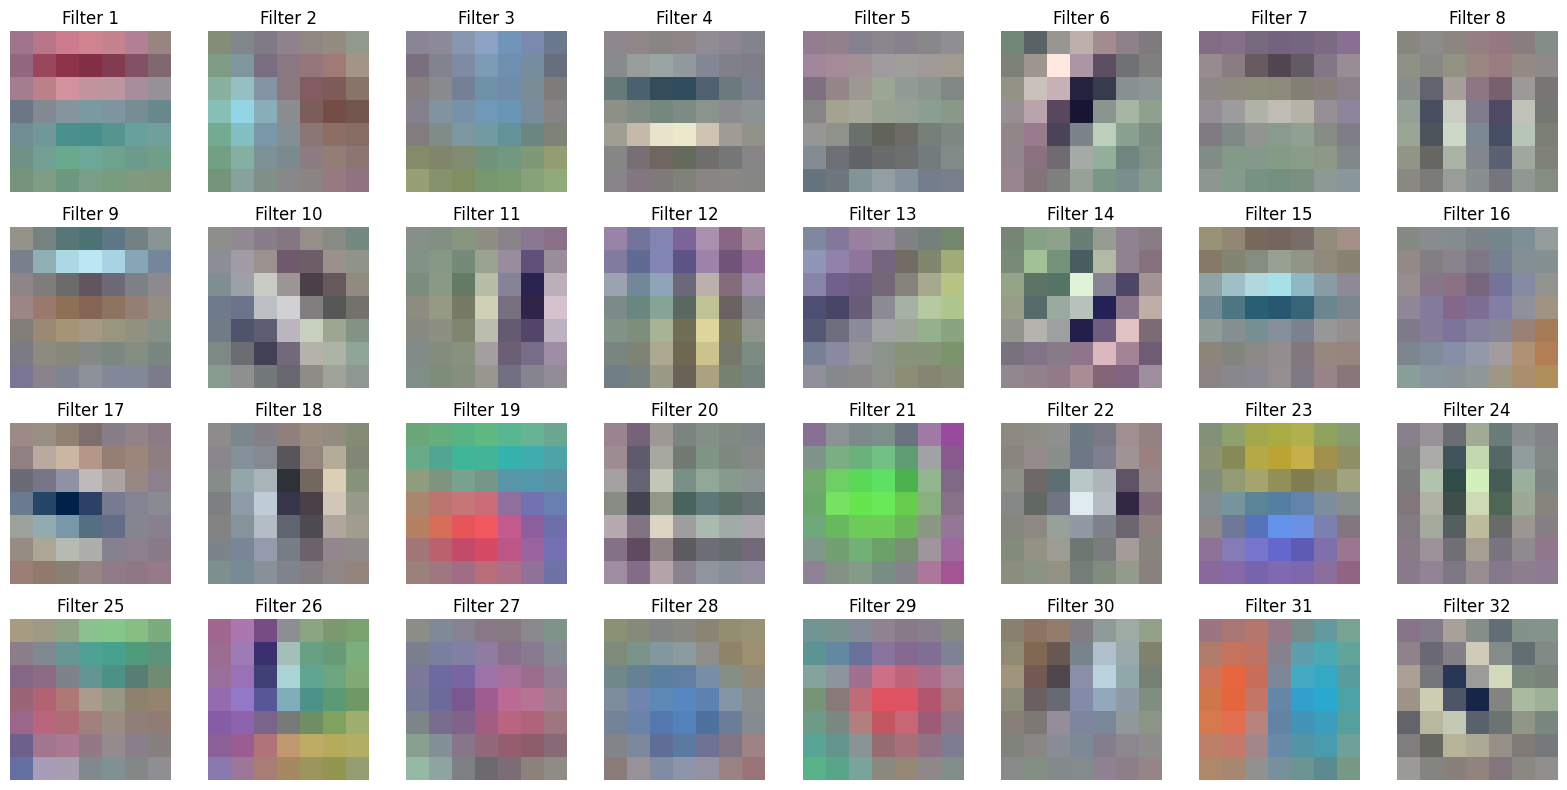

In [17]:
visualize_filters(model_CNN.conv1)
plt.tight_layout()
plt.show()

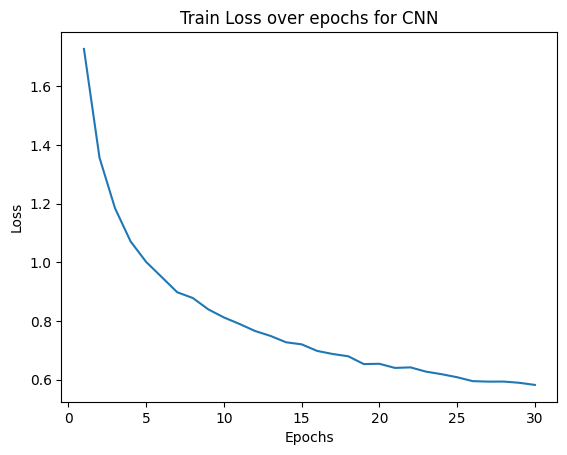

In [18]:
plt.plot(range(1, epochs + 1), train_loss_cnn, label="Training Loss")
plt.title('Train Loss over epochs for CNN')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Weights and Hyperparameters:

* In PyTorch, the weights of convolutional layers (nn.Conv2d) and linear layers (nn.Linear) are initialized using a technique called Kaiming (He) initialization. This initialization method is particularly suitable for deep networks using ReLU or ReLU-like activation functions, such as the Mish activation function. Kaiming initialization is designed to keep the variance of the activations approximately constant across layers, which helps prevent the vanishing or exploding gradient problem during training.
* learning_rate: This is the learning rate for the optimizer. It determines the step size the optimizer takes when updating the model's weights during training. A higher learning rate means the model will learn faster but may overshoot the optimal weights, while a lower learning rate means the model will learn more slowly but with potentially better convergence. In this case, the learning rate is set to 0.005.
* epochs: The number of epochs represents how many times the model iterates over the entire training dataset. More epochs typically lead to better performance, but at the cost of increased computation time. In this case, the number of epochs is set to 30.
* criterion: This is the loss function used to evaluate the model's predictions during training. In this case, it's the cross-entropy loss, which is commonly used for multi-class classification problems.
* optimizer: The optimizer updates the model's weights based on the gradients of the loss function. In this case, the AdamW optimizer is used, which is a variant of the Adam optimizer that includes weight decay regularization. The learning rate (lr) is set to the previously defined learning_rate value.
* scheduler: The learning rate scheduler adjusts the learning rate during training according to a predefined schedule. In this case, a StepLR scheduler is used, which multiplies the learning rate by a factor (gamma) every step_size epochs. The gamma value is set to 0.1, meaning the learning rate will be reduced to 10% of its current value every 30 epochs. In this specific example, since the number of epochs is also set to 30, the learning rate will be reduced once after the 30th epoch.

## Part 2 (20 points)

In [19]:
class BNCNN(nn.Module):
    def __init__(self):
        super(BNCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 7)
        self.bn1 = nn.BatchNorm2d(32)
        self.mish = nn.Mish()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.bn3 = nn.BatchNorm2d(64)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.mish(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.mish(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.mish(x)
        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

Hyperparameter tuning

In [20]:
learning_rate = 0.005
epochs = 30

tune_CNN_bn = BNCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(tune_CNN_bn.parameters(), lr=learning_rate, weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

tune_CNN_bn, train_loss = train_model(tune_CNN_bn, small_train_loader, criterion, optimizer, device, epochs, scheduler)

Epoch [1/30], Loss: 2.1535
Epoch [2/30], Loss: 1.9739
Epoch [3/30], Loss: 1.8881
Epoch [4/30], Loss: 1.8167
Epoch [5/30], Loss: 1.7522
Epoch [6/30], Loss: 1.7226
Epoch [7/30], Loss: 1.7015
Epoch [8/30], Loss: 1.6804
Epoch [9/30], Loss: 1.6244
Epoch [10/30], Loss: 1.5956
Epoch [11/30], Loss: 1.5811
Epoch [12/30], Loss: 1.5657
Epoch [13/30], Loss: 1.5694
Epoch [14/30], Loss: 1.5801
Epoch [15/30], Loss: 1.5398
Epoch [16/30], Loss: 1.5018
Epoch [17/30], Loss: 1.4496
Epoch [18/30], Loss: 1.4577
Epoch [19/30], Loss: 1.4604
Epoch [20/30], Loss: 1.4213
Epoch [21/30], Loss: 1.4065
Epoch [22/30], Loss: 1.3744
Epoch [23/30], Loss: 1.3749
Epoch [24/30], Loss: 1.3461
Epoch [25/30], Loss: 1.3020
Epoch [26/30], Loss: 1.3062
Epoch [27/30], Loss: 1.2778
Epoch [28/30], Loss: 1.2616
Epoch [29/30], Loss: 1.2616
Epoch [30/30], Loss: 1.2221


| lr | batch size | epochs | loss |
|---|---|---|---|
|0.001|128|10|1.6094|
|0.0001|128|20|1.8285|
|0.00075|128|20|1.4736|
|0.00075|256|20|1.5612|
|0.0015|128|15|1.5160|
|0.002|128|15|1.4835|
|0.003|128|15|1.5107|
|0.001|128|30|1.1675|

Train on full dataset

In [21]:
learning_rate = 0.005
epochs = 30

model_CNN_bn = BNCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_CNN_bn.parameters(), lr=learning_rate, weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

model_CNN_bn, train_loss_bn = train_model(model_CNN_bn, train_loader, criterion, optimizer, device, epochs, scheduler)

Epoch [1/30], Loss: 1.5912
Epoch [2/30], Loss: 1.2921
Epoch [3/30], Loss: 1.1603
Epoch [4/30], Loss: 1.0729
Epoch [5/30], Loss: 1.0125
Epoch [6/30], Loss: 0.9621
Epoch [7/30], Loss: 0.9210
Epoch [8/30], Loss: 0.8829
Epoch [9/30], Loss: 0.8535
Epoch [10/30], Loss: 0.8270
Epoch [11/30], Loss: 0.7975
Epoch [12/30], Loss: 0.7840
Epoch [13/30], Loss: 0.7603
Epoch [14/30], Loss: 0.7495
Epoch [15/30], Loss: 0.7317
Epoch [16/30], Loss: 0.7187
Epoch [17/30], Loss: 0.7058
Epoch [18/30], Loss: 0.6965
Epoch [19/30], Loss: 0.6834
Epoch [20/30], Loss: 0.6760
Epoch [21/30], Loss: 0.6651
Epoch [22/30], Loss: 0.6612
Epoch [23/30], Loss: 0.6529
Epoch [24/30], Loss: 0.6433
Epoch [25/30], Loss: 0.6388
Epoch [26/30], Loss: 0.6302
Epoch [27/30], Loss: 0.6266
Epoch [28/30], Loss: 0.6190
Epoch [29/30], Loss: 0.6123
Epoch [30/30], Loss: 0.6114


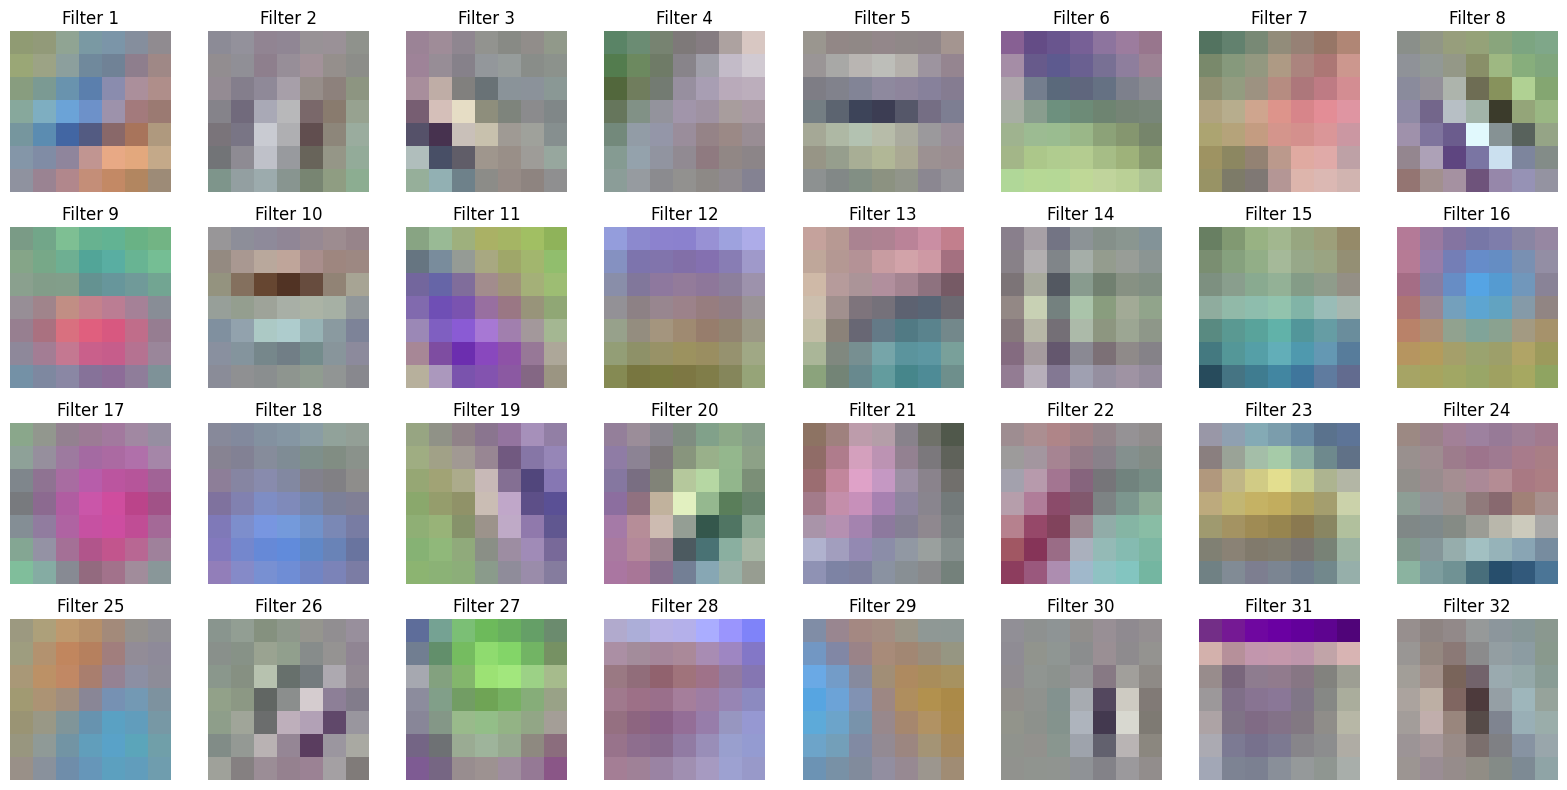

In [22]:
visualize_filters(model_CNN_bn.conv1)
plt.tight_layout()
plt.show()

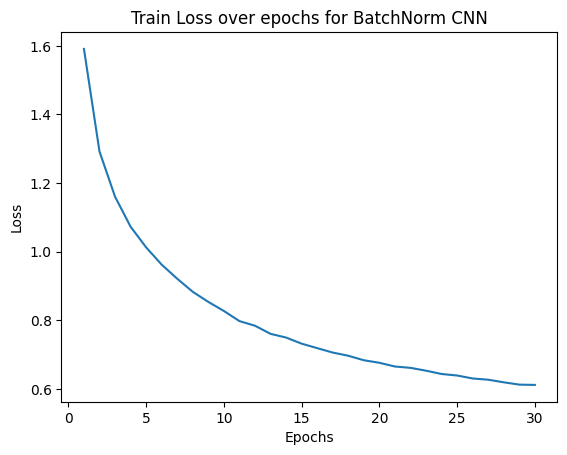

In [23]:
plt.plot(range(1, epochs + 1), train_loss_bn, label="Training Loss")
plt.title('Train Loss over epochs for BatchNorm CNN')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

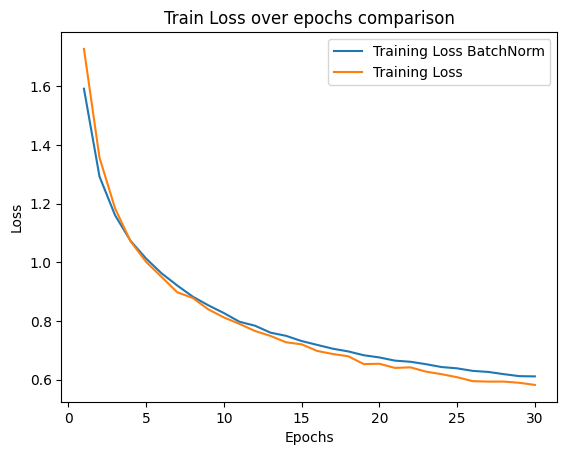

In [24]:
plt.plot(range(1, epochs + 1), train_loss_bn, label="Training Loss BatchNorm")
plt.plot(range(1, epochs + 1), train_loss_cnn, label="Training Loss")
plt.title('Train Loss over epochs comparison')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
test_accuracy = evaluate_model(model_CNN_bn, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 76.27%


## Part 3

In [28]:
class DeepMishCNN(nn.Module):
    def __init__(self):
        super(DeepMishCNN, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.Mish(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.Mish(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.Mish(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.Mish(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.Mish(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.Mish(),
            nn.MaxPool2d(2, 2)
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(256 * 4 * 4, 512),
            nn.BatchNorm1d(512),
            nn.Mish(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.Mish(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [34]:
learning_rate = 0.0005
epochs = 30

deep_model = DeepMishCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(deep_model.parameters(), lr=learning_rate, weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

deep_model, train_loss = train_model(deep_model, small_train_loader, criterion, optimizer, device, epochs, scheduler)

Epoch [1/30], Loss: 2.0846
Epoch [2/30], Loss: 1.6475
Epoch [3/30], Loss: 1.4410
Epoch [4/30], Loss: 1.3158
Epoch [5/30], Loss: 1.1765
Epoch [6/30], Loss: 1.1302
Epoch [7/30], Loss: 1.0844
Epoch [8/30], Loss: 0.9858
Epoch [9/30], Loss: 0.9071
Epoch [10/30], Loss: 0.8314
Epoch [11/30], Loss: 0.7714
Epoch [12/30], Loss: 0.7182
Epoch [13/30], Loss: 0.6688
Epoch [14/30], Loss: 0.6673
Epoch [15/30], Loss: 0.5994
Epoch [16/30], Loss: 0.5343
Epoch [17/30], Loss: 0.4534
Epoch [18/30], Loss: 0.4535
Epoch [19/30], Loss: 0.3951
Epoch [20/30], Loss: 0.3849
Epoch [21/30], Loss: 0.3996
Epoch [22/30], Loss: 0.3434
Epoch [23/30], Loss: 0.3090
Epoch [24/30], Loss: 0.2677
Epoch [25/30], Loss: 0.2673
Epoch [26/30], Loss: 0.2521
Epoch [27/30], Loss: 0.2238
Epoch [28/30], Loss: 0.2222
Epoch [29/30], Loss: 0.1809
Epoch [30/30], Loss: 0.1805


In [35]:
learning_rate = 0.0005
epochs = 30

deep_CNN = DeepMishCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(deep_CNN.parameters(), lr=learning_rate, weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

deep_CNN, train_loss = train_model(deep_CNN, train_loader, criterion, optimizer, device, epochs, scheduler)

Epoch [1/30], Loss: 1.1749
Epoch [2/30], Loss: 0.7841
Epoch [3/30], Loss: 0.6520
Epoch [4/30], Loss: 0.5616
Epoch [5/30], Loss: 0.5020
Epoch [6/30], Loss: 0.4555
Epoch [7/30], Loss: 0.4214
Epoch [8/30], Loss: 0.3846
Epoch [9/30], Loss: 0.3573
Epoch [10/30], Loss: 0.3314
Epoch [11/30], Loss: 0.3064
Epoch [12/30], Loss: 0.2906
Epoch [13/30], Loss: 0.2710
Epoch [14/30], Loss: 0.2520
Epoch [15/30], Loss: 0.2428
Epoch [16/30], Loss: 0.2235
Epoch [17/30], Loss: 0.2138
Epoch [18/30], Loss: 0.2027
Epoch [19/30], Loss: 0.1877
Epoch [20/30], Loss: 0.1790
Epoch [21/30], Loss: 0.1700
Epoch [22/30], Loss: 0.1568
Epoch [23/30], Loss: 0.1475
Epoch [24/30], Loss: 0.1466
Epoch [25/30], Loss: 0.1337
Epoch [26/30], Loss: 0.1254
Epoch [27/30], Loss: 0.1208
Epoch [28/30], Loss: 0.1148
Epoch [29/30], Loss: 0.1109
Epoch [30/30], Loss: 0.1066


In [36]:
test_accuracy = evaluate_model(deep_CNN, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 88.76%


The DeepMishCNN architecture is designed as a deep convolutional neural network that uses the Mish activation function to improve performance. Here's a description of the architecture and the design choices:

* Input: The input to the network is a 3-channel (RGB) image, typically with dimensions 32x32 for the CIFAR-10 dataset.
* Convolutional layers: There are six convolutional layers in total. The first three layers use 32 filters, and the last three layers use 64 filters. All layers have a kernel size of 3x3 and padding of 1. This choice of kernel size and padding maintains the spatial dimensions of the feature maps and provides good local feature extraction capabilities.
* Mish activation function: Mish is a relatively new activation function that has been shown to improve the performance of deep neural networks. It is used after each convolutional layer to introduce non-linearity in the network. The Mish function is defined as x * tanh(softplus(x)), where softplus(x) is log(1 + exp(x)).
* Batch normalization: Batch normalization is used after each convolutional layer to stabilize training and reduce internal covariate shift. This can help improve convergence and overall performance.
* Pooling layers: Two max-pooling layers with a 2x2 kernel and a stride of 2 are used after the first and fourth convolutional layers to reduce the spatial dimensions of the feature maps and enhance the model's translation invariance.
* Global average pooling: A global average pooling layer is used to reduce the spatial dimensions of the final feature map to 1x1. This operation helps reduce the number of parameters in the network and makes the model more robust to spatial variations.
* Fully connected (linear) layer: A fully connected layer with 10 output units is used to produce the final class probabilities. This layer has a softmax activation to ensure the output probabilities sum to 1.
* Regularization: Dropout with a rate of 0.2 is applied between the convolutional and fully connected layers to improve generalization and prevent overfitting.

This architecture aims to provide good performance on the CIFAR-10 dataset while keeping the model reasonably small and efficient. The choice of kernel sizes, filter numbers, pooling layers, and the Mish activation function is based on empirical evidence and best practices for designing deep convolutional neural networks. The use of batch normalization and dropout helps improve training stability and generalization.

(Used ChatGPT and https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48)

In [70]:
train_loss_deep = [1.1749, 0.7841, 0.6520, 0.5616, 0.5020, 0.4555, 0.4214, 0.3846, 0.3573, 0.3314, 0.3064, 0.2906, 0.2710, 0.2520, 0.2428, 0.2235, 0.2138, 0.2027, 0.1877, 0.1790, 0.1700, 0.1568, 0.1475, 0.1466, 0.1337, 0.1254, 0.1208, 0.1148, 0.1109, 0.1066]

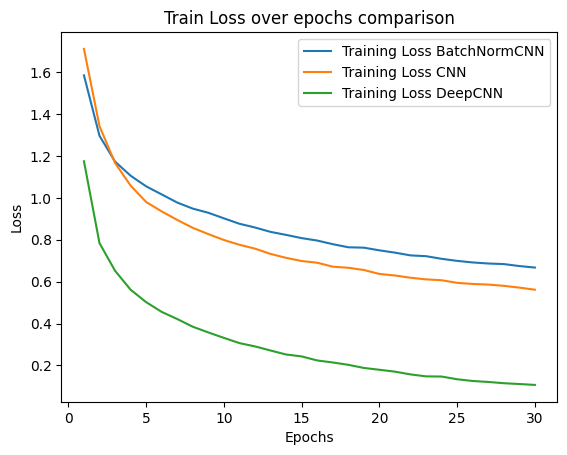

In [71]:
plt.plot(range(1, epochs + 1), train_loss_bn, label="Training Loss BatchNormCNN")
plt.plot(range(1, epochs + 1), train_loss_cnn, label="Training Loss CNN")
plt.plot(range(1, epochs + 1), train_loss_deep, label="Training Loss DeepCNN")
plt.title('Train Loss over epochs comparison')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()